DATA COLLECTION
```
-> Collect the dataset or create the dataset
```

DATA PREPROCESSING


```
-> Import the libraries.
-> Import the dataset.
-> Check for null values.
-> Data Visualization.
-> Outlier Detection.
-> Splitting Dependent and Independent variables.
-> Encoding.
-> Feature Scaling.
-> Splitting Dataset into Train and Test.

```


MODEL BUILDING
```
-> Import the model building libraries.
-> Initializing the model.
-> Training and testing the model.
-> Evaluation of Model.
-> Save the model.
```


APPLICATION BUILDING
```
-> Create an HTML file.
-> Build a Python code.

```



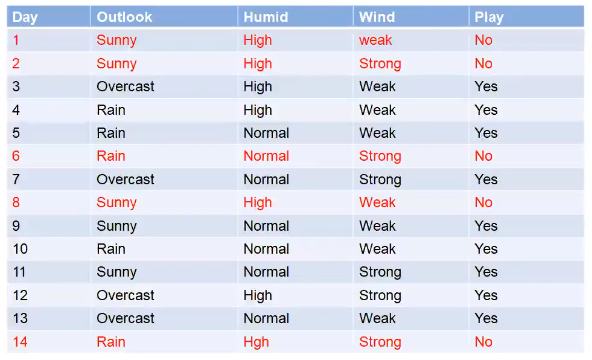

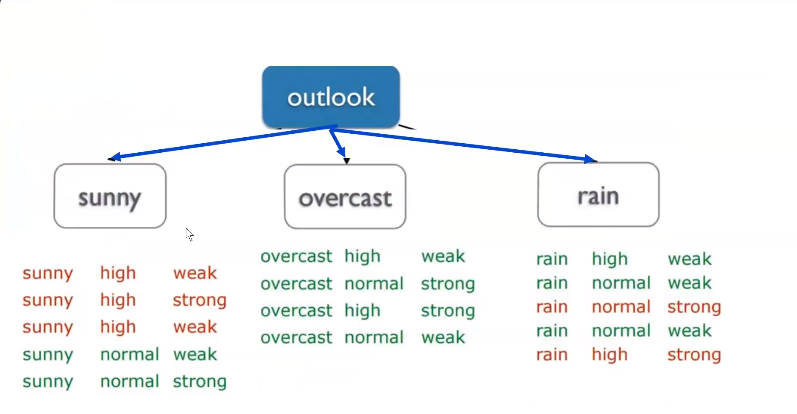

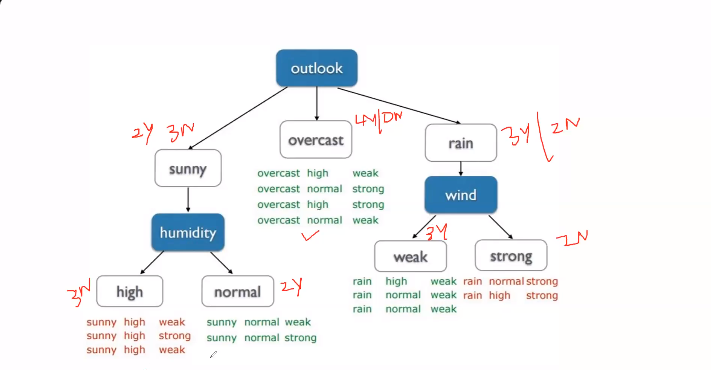

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Social_Network_Ads.csv")

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.shape

(400, 5)

In [ ]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
# Detection of null values
df.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<ipython-input-10-eb5d36fb3f65>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

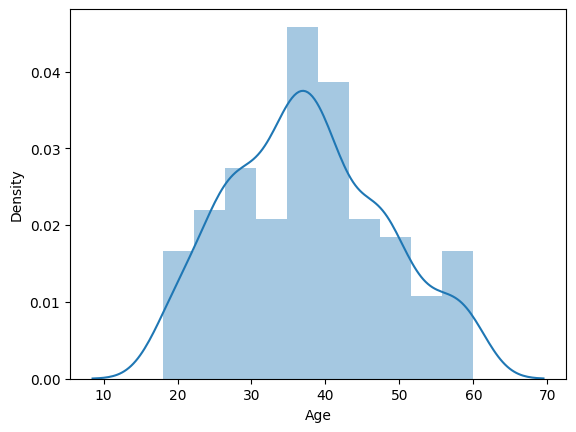

In [ ]:
# @title DATA VISUALIZATION

sns.distplot(df["Age"])

In [ ]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<ipython-input-12-fe43fffaf13b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

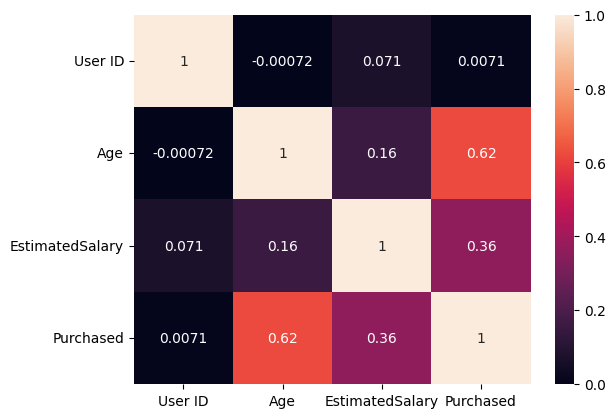

In [ ]:
sns.heatmap(df.corr(), annot = True)

<Axes: >

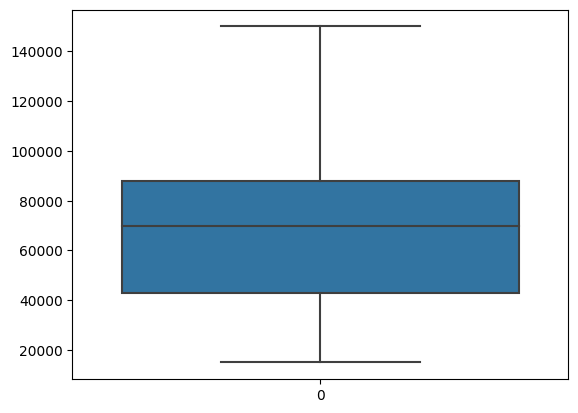

In [ ]:
sns.boxplot(df["EstimatedSalary"])

<Axes: >

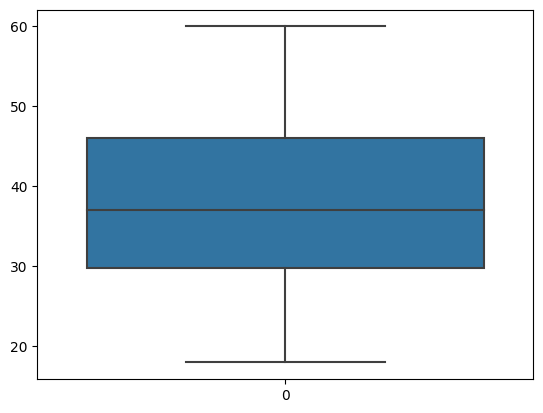

In [ ]:
sns.boxplot(df.Age)

In [ ]:
# @title Splitting Dependent and Independent Variable

X = df.iloc[:, 1:4]
X

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
Y = df.iloc[:, 4]
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [ ]:
type(Y)

pandas.core.series.Series

In [ ]:
# @title Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
X["Gender"] = le.fit_transform(X["Gender"])

In [ ]:
X.head()

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [ ]:
# applying fit transform on all columns with 1 command
X_Scaled = pd.DataFrame(ms.fit_transform(X), columns = X.columns)

In [ ]:
X_Scaled

,Gender,Age,EstimatedSalary
0,1.0,0.023810,0.029630
1,1.0,0.404762,0.037037
2,0.0,0.190476,0.207407
3,0.0,0.214286,0.311111
4,1.0,0.023810,0.451852
...,...,...,...
395,0.0,0.666667,0.192593
396,1.0,0.785714,0.059259
397,0.0,0.761905,0.037037
398,1.0,0.428571,0.133333


In [ ]:
#Splitting dataset into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_Scaled, Y, test_size=0.2, random_state = 0)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(320, 3) (80, 3) (320,) (80,)


# MODEL BUILDING

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [ ]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
pred = dtc.predict(X_test)

In [ ]:
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1])

In [ ]:
Y_test

132    0
309    0
341    0
196    0
246    0
      ..
14     0
363    0
304    0
361    1
329    1
Name: Purchased, Length: 80, dtype: int64

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
dtc.predict(ms.transform([[1, 23, 40000]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
# @title Evaluation of model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
# Accuracy Score
accuracy = accuracy_score(Y_test, pred)
accuracy

0.925

In [ ]:
confusion_matrix(Y_test, pred)

array([[54,  4],
       [ 2, 20]])

In [ ]:
pd.crosstab(Y_test, pred)

col_0,0,1
Purchased,,
0,54,4
1,2,20


In [ ]:
(58+16)/(58+16+6+0)

0.925

In [ ]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.83      0.91      0.87        22

    accuracy                           0.93        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.93      0.93      0.93        80



In [ ]:
# PRECISION
# Of all postitive predictions, how many are actually positive

# Precision = TP / (TP + FP)

In [ ]:
# RECALL
# Of all real postive cases, how many are actually predicted postive

# Recall = TP / (TP + FN)

In [ ]:
# F1 Score
# = (2 * precision * recall) / (precison + recall)

In [ ]:
# @title ROC - AUC CURVE

# Here, "prob" is the actualy y pred (from image) which is later calculated as 0 or 1 after application of various thresholds
prob = dtc.predict_proba(X_test)[:,1] # the prob variable has 2 columns, 0th column is prob of no, 1st column is prob of yes

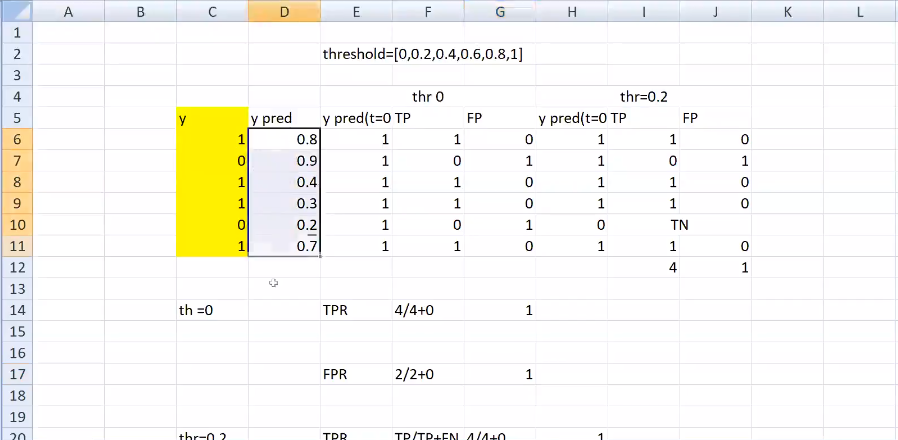

In [ ]:
prob

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.])

In [ ]:
# roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, prob)

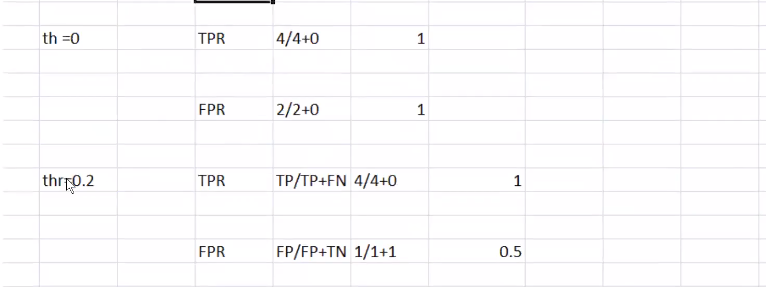

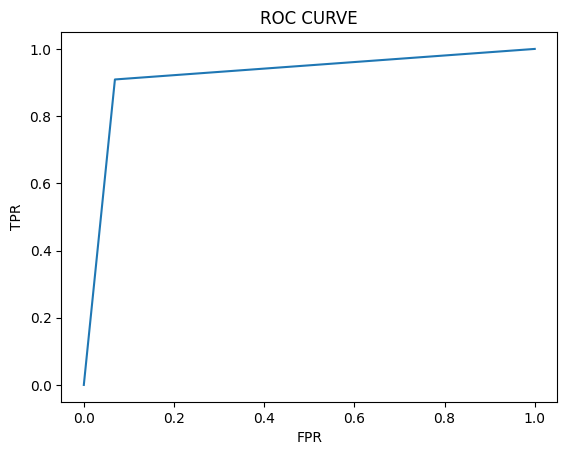

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

# HYPER PARAMETER TUNING

In [ ]:
from sklearn import tree

[Text(0.4708333333333333, 0.9666666666666667, 'x[1] <= 0.631\ngini = 0.47\nsamples = 320\nvalue = [199, 121]'),
 Text(0.25555555555555554, 0.9, 'x[2] <= 0.559\ngini = 0.311\nsamples = 228\nvalue = [184, 44]'),
 Text(0.15555555555555556, 0.8333333333333334, 'x[1] <= 0.44\ngini = 0.082\nsamples = 186\nvalue = [178, 8]'),
 Text(0.13333333333333333, 0.7666666666666667, 'gini = 0.0\nsamples = 120\nvalue = [120, 0]'),
 Text(0.17777777777777778, 0.7666666666666667, 'x[2] <= 0.507\ngini = 0.213\nsamples = 66\nvalue = [58, 8]'),
 Text(0.15555555555555556, 0.7, 'x[2] <= 0.389\ngini = 0.17\nsamples = 64\nvalue = [58, 6]'),
 Text(0.13333333333333333, 0.6333333333333333, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(0.17777777777777778, 0.6333333333333333, 'x[2] <= 0.411\ngini = 0.312\nsamples = 31\nvalue = [25, 6]'),
 Text(0.15555555555555556, 0.5666666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2, 0.5666666666666667, 'x[1] <= 0.56\ngini = 0.278\nsamples = 30\nvalue = [25,

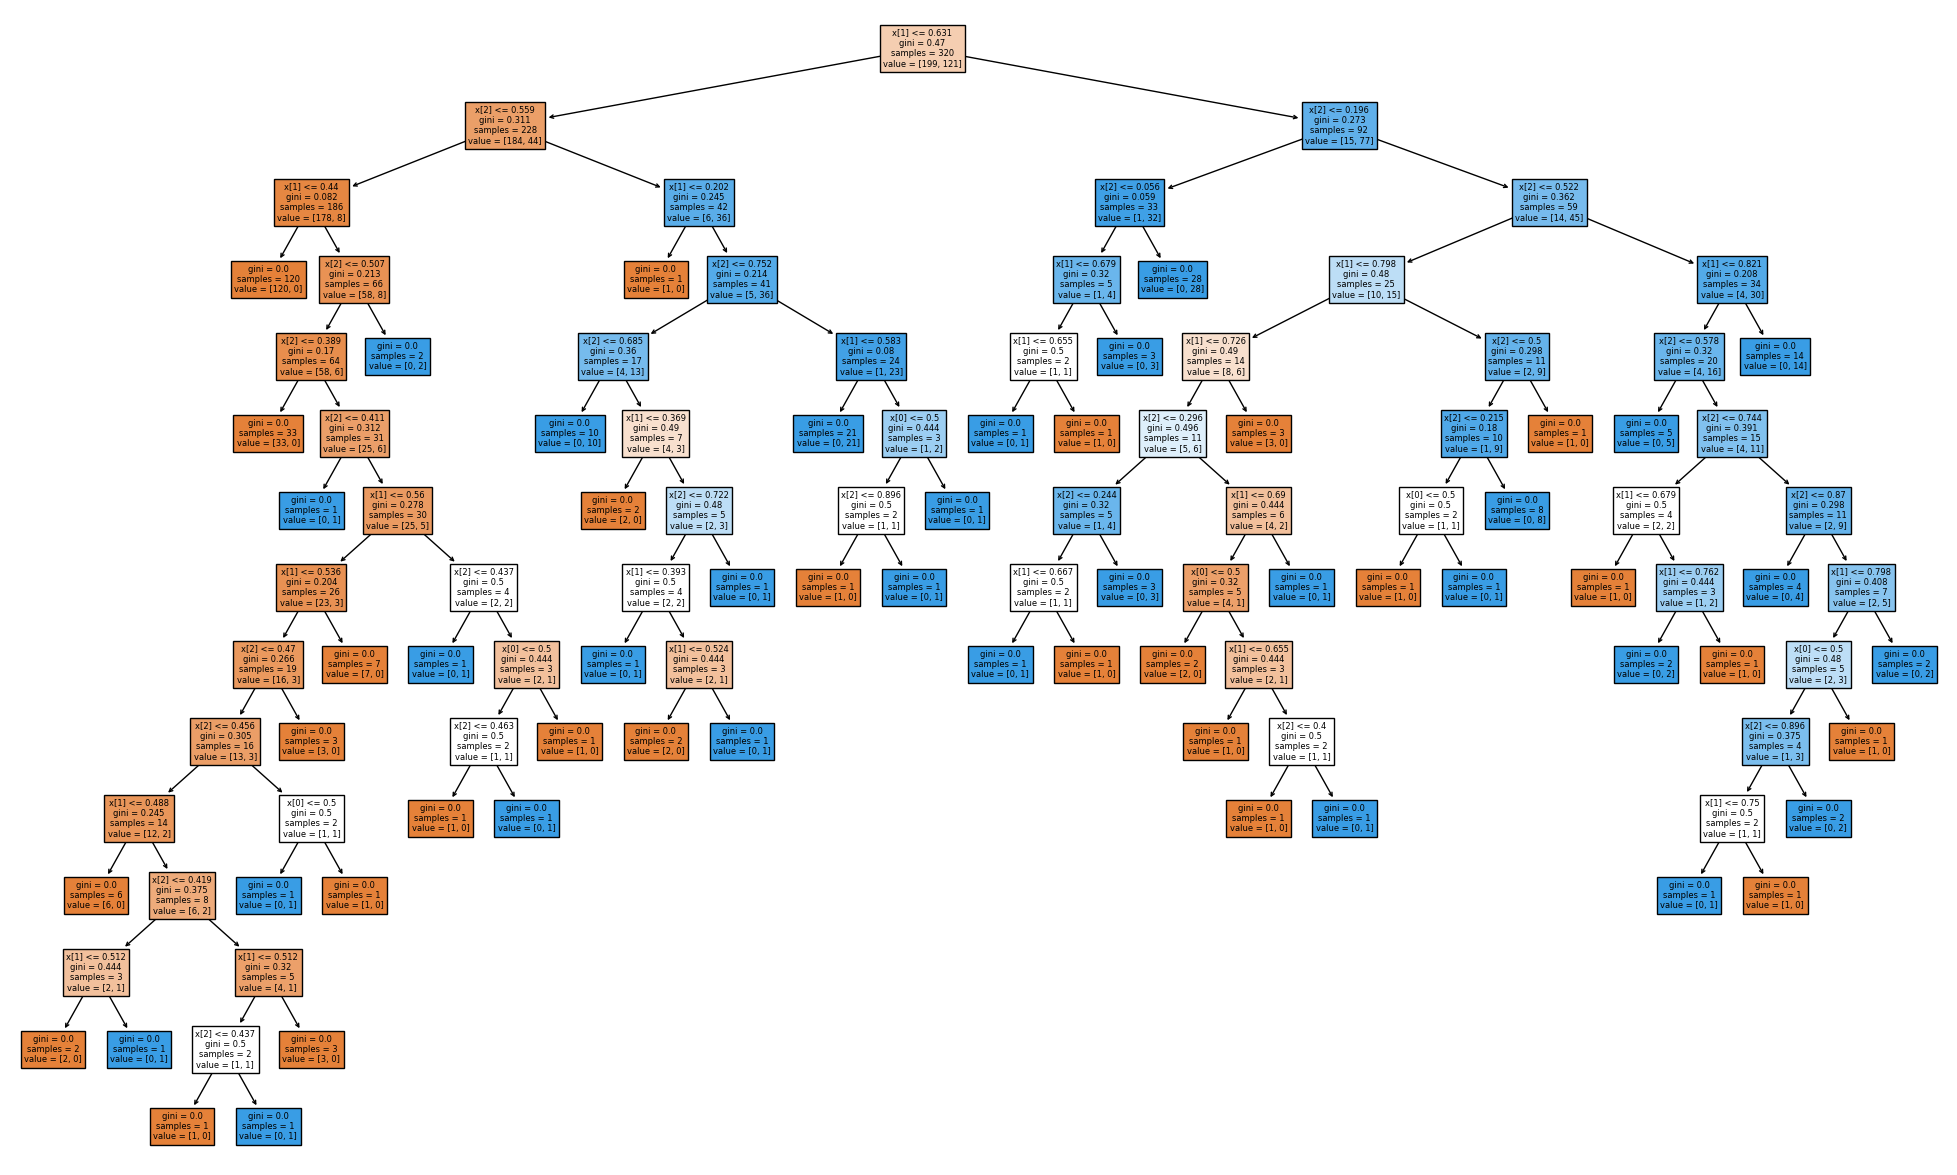

In [ ]:
plt.figure(figsize=(25,15))
tree.plot_tree(dtc, filled=True)

In [ ]:
from sklearn.model_selection import GridSearchCV

# search documentation of parameters for Decision Tree Classifier
parameters = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : [1, 2, 3, 4, 5],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [ ]:
# using GridSearchCV to figure out the best hyperparameters
grid_search = GridSearchCV(estimator = dtc, param_grid = parameters, cv=5, scoring ="accuracy")

In [ ]:
grid_search.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [ ]:
# New DTC object after hyperparmeter Tuning.
dtc_cv = DecisionTreeClassifier(criterion = 'entropy',  max_depth = 4, max_features = 'sqrt', splitter = 'best')
dtc_cv.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features='sqrt')

In [ ]:
pred = dtc_cv.predict(X_test)

In [ ]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [ ]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.94      0.77      0.85        22

    accuracy                           0.93        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.93      0.93      0.92        80



[Text(0.44047619047619047, 0.9, 'x[1] <= 0.631\nentropy = 0.957\nsamples = 320\nvalue = [199, 121]'),
 Text(0.19047619047619047, 0.7, 'x[0] <= 0.5\nentropy = 0.708\nsamples = 228\nvalue = [184, 44]'),
 Text(0.09523809523809523, 0.5, 'x[1] <= 0.202\nentropy = 0.707\nsamples = 109\nvalue = [88, 21]'),
 Text(0.047619047619047616, 0.3, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.14285714285714285, 0.3, 'x[1] <= 0.56\nentropy = 0.811\nsamples = 84\nvalue = [63, 21]'),
 Text(0.09523809523809523, 0.1, 'entropy = 0.767\nsamples = 76\nvalue = [59, 17]'),
 Text(0.19047619047619047, 0.1, 'entropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.2857142857142857, 0.5, 'x[1] <= 0.226\nentropy = 0.708\nsamples = 119\nvalue = [96, 23]'),
 Text(0.23809523809523808, 0.3, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.3333333333333333, 0.3, 'x[1] <= 0.583\nentropy = 0.803\nsamples = 94\nvalue = [71, 23]'),
 Text(0.2857142857142857, 0.1, 'entropy = 0.789\nsamples = 93\nvalue = [71, 22

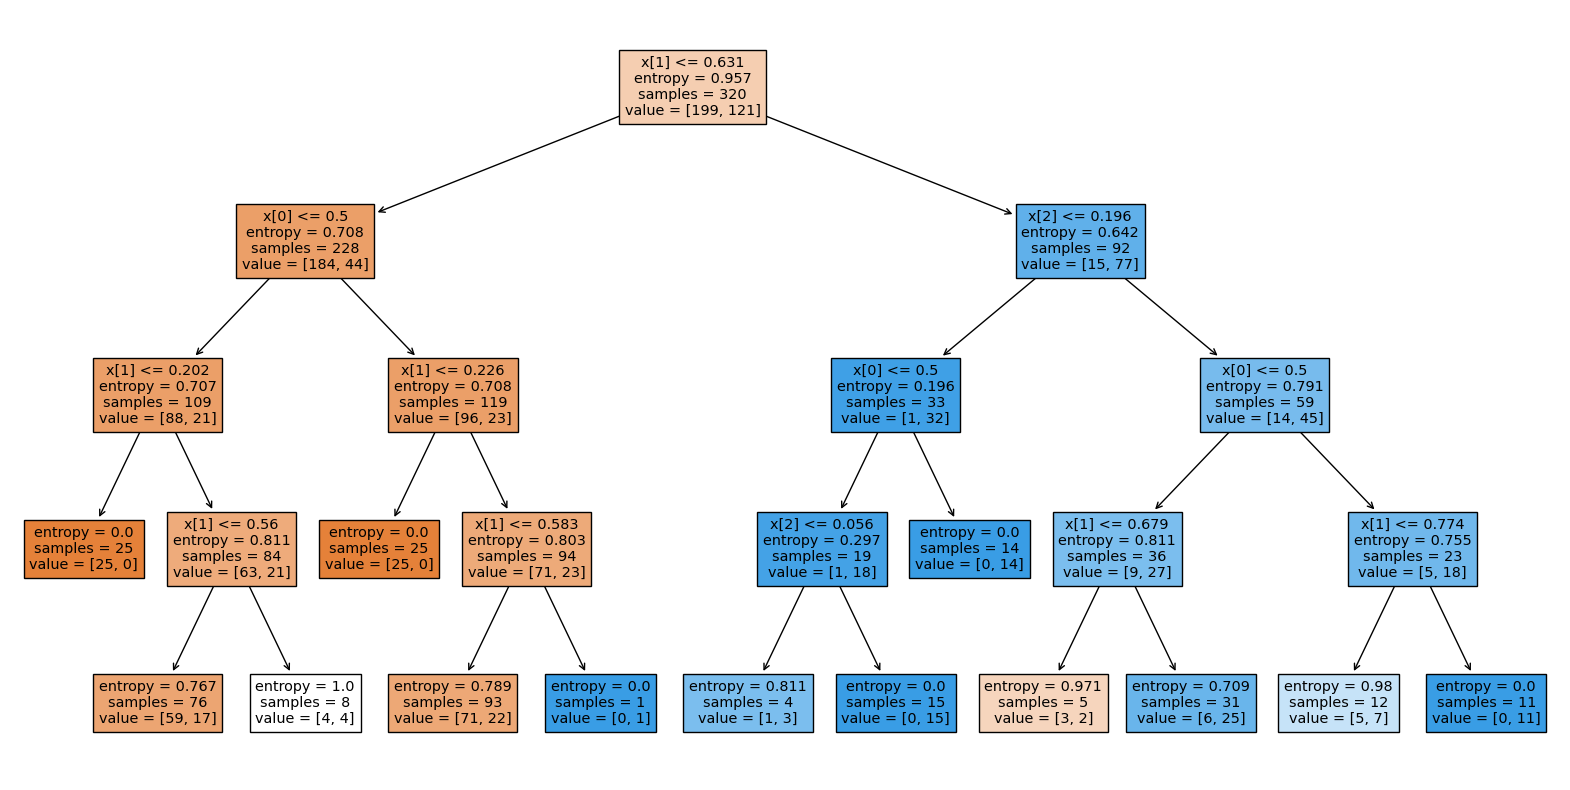

In [ ]:
plt.figure(figsize=(20,10))
tree.plot_tree(dtc_cv, filled=True)

# ENSEMBLE TECHNIQUE : BAGGING
# RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [ ]:
forest_params = [{
    'max_depth':list(range(10,15)),
    'max_features': list(range(0,14))
    }]

In [ ]:
rfc_grid_search = GridSearchCV(rfc, param_grid = forest_params, cv=10, scoring="accuracy")

In [ ]:
rfc_grid_search.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [ ]:
rfc_grid_search.best_params_

{'max_depth': 10, 'max_features': 1}

In [ ]:
rfc_cv = DecisionTreeClassifier(max_depth = 12, max_features = 1)
rfc_cv.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=12, max_features=1)

In [ ]:
pred = rfc_cv.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.83      0.91      0.87        22

    accuracy                           0.93        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.93      0.93      0.93        80

